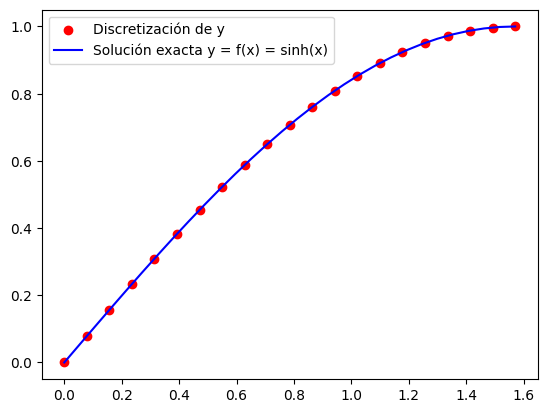

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

'''
    resuelve Y' = F(x,Y), con x \in \R y Y\in \R^n
'''
def RK4(f,a,b,n,x0,dim):
  u = np.zeros((n+1,dim),float)
  h = (b-a)/n
  t = np.array([a+i*h for i in range(n+1)])
  u[0]=x0
  for i in range(n):
    K1 = f(t[i],u[i])
    K2 = f(t[i]+h/2,u[i]+K1*h/2)
    K3 = f(t[i]+h/2,u[i]+K2*h/2)
    K4 = f(t[i]+h,u[i]+h*K3)
    u[i+1]= u[i] + (h/6)*(K1+2*K2+2*K3+K4)
  return u



'''
    MÉTODO PARA EDO'S LINEALES:
    disparo() retorna una discretización del problema
    y'' = py' + qy + r, en [a,b]
    con y(a)= alfa y y(b)=beta
'''

def disparo(p,q,r,a,alfa,b,beta,n):
  f = lambda x,z: np.array([z[1],
                            q(x)*z[0]+p(x)*z[1]+r(x),
                            z[3],
                            q(x)*z[2]+p(x)*z[3]+r(x)])
  z0 = np.array([alfa,0,0,1])
  Z = RK4(f,a,b,n,z0,4)
  y1 = np.transpose(Z)[0]
  y2 = np.transpose(Z)[2]
  Y = y1 + ((beta - y1[n])/y2[n])*y2
  return Y

p = lambda x: 0
q = lambda x: -1
r = lambda x: 0
a = 0
alfa =0
b = np.pi/2
beta = 1
n = 20
U = disparo(p,q,r,a,alfa,b,beta,n)
h = (b-a)/n
t = np.array([a+i*h for i in range(n+1)])
plt.scatter(t,U, c = 'red')

#VERIFICANDO CON SOLUCIÓN EXACTA:
g = lambda x: np.sin(x)
X = np.linspace(a,b,30)
plt.plot(X,g(X), c= 'blue')
plt.legend(["Discretización de y","Solución exacta y = f(x) = sinh(x)"])

Valor de t para el cual distancia(t) = 0:  20.379085167604092


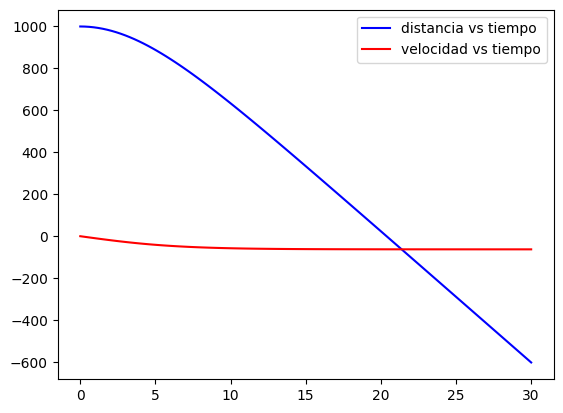

In [ ]:
'''
    MÉTODO PARA NO LINEALES CON REGLA FALSA
    IMPLEMENTACIÓN DE REGLA FALSA:
'''

import numpy as np
import matplotlib.pyplot as plt

def falsePosition(f,x0,x1,tol):
    i = 1
    condition = True
    while condition:
        x2 = x0 - (x1-x0) * f(x0)/( f(x1) - f(x0) )
        if f(x0) * f(x2) < 0:
            x1 = x2
        else:
            x0 = x2
        i+=1
        condition = abs(f(x2)) > tol
    return x2

'''
    el siguiente código toma
    y'' = f(x,y,y'),
    y(a) = alfa,
    y'(a) = beta
    y mapea discretización de y & y' en [a,b]
'''

def pseudo_code(f,a,b,alfa,beta,n):
  F = lambda x,u: np.array([u[1],f(x,u[0],u[1])])
  x0 = np.array([alfa,beta])
  dim = 2
  u = RK4(F,a,b,n,x0,dim)
  u = np.transpose(u)
  '''
      en caso de ser necesario:
      u^t[0] comportamiento de y discretizado
      u^t[0][-1] = y(b)
      u^t[1] comportamiento de y' discretizado
      u^t[1][-1] = y'(b)
  '''
  return u

cd = 0.225
g = 9.81
m = 90
f = lambda x,y,z: -(g - (cd/m)*z**2)
a = 0
alfa = 1000
beta = 0
b = 30
n = 100
u = pseudo_code(f,a,b,alfa,beta,n)
h = (b-a)/n
t = np.array([a+i*h for i in range(n+1)])
plt.plot(t,u[0], c = 'blue', label='distancia vs tiempo')
plt.plot(t,u[1], c = 'red', label='velocidad vs tiempo')
plt.legend()
def r(t):
  return pseudo_code(f,a,t,alfa,beta,n)[0][-1]
def v(t):
  return pseudo_code(f,a,t,alfa,beta,n)[1][-1]

t = 18
for i in range(6):
  t += - r(t)/v(t)

print("Valor de t para el cual distancia(t) = 0: ", t)


In [ ]:


'''
    El verdadero código con regla falsa:
    toma el problema
    y'' = f(x,y,y')
    y(a) = alfa
    y(b) = beta
    tol = error en regla falsa
    y plotea discretización de y & y' en [a,b]
'''

def disparo_no_lineal(f,a,b,alfa,beta,n,tol):
  y = lambda x,M: pseudo_code(f,a,x,alfa,M,n)[0][-1]
  y_d = lambda x,M: pseudo_code(f,a,x,alfa,M,n)[1][-1]
  F = lambda M: y(b,M) - beta
  '''
      M0 y M1 son valores introducidos manualmente:
  '''
  M0 = -1
  M1 = 1
  M = falsePosition(F,M0,M1,tol)
  return pseudo_code(f,a,b,alfa,M,n)

'''
    TESTEANDO GRÁFICAMENTE:
    ploteando discretización
'''
Y, dY = u
plt.scatter(t,Y, c = 'red')
X = np.linspace(a,b,100)
h = lambda x: np.log(np.sin(x))
l = lambda x: np.cos(x) / np.sin(x)
plt.plot(X,h(X), c = 'red')
plt.plot(X,l(X), c = 'blue')
plt.legend(["discretización de y", "discretización de y'","y = ln(sin(x))", "y' = cot(x)"])
# plt.scatter(t,u[1], c = 'blue')
# discretización de y'
# dY = u[1]
# plt.scatter(t,u[1], c = 'red')
# plt.plot(t,u[1], c = 'green')
# ploteando solución

'\n    TESTEANDO GRÁFICAMENTE:\n'

2.6266963737560314 3.6262655766694696
4.253228713421075 3.6262655766694696
7.506293392751163 3.6262655766694696
14.01242275141134 3.6262655766694696
27.024681468731693 3.6262655766694696
53.0491989033724 3.6262655766694696
105.0982337726538 3.6262655766694696


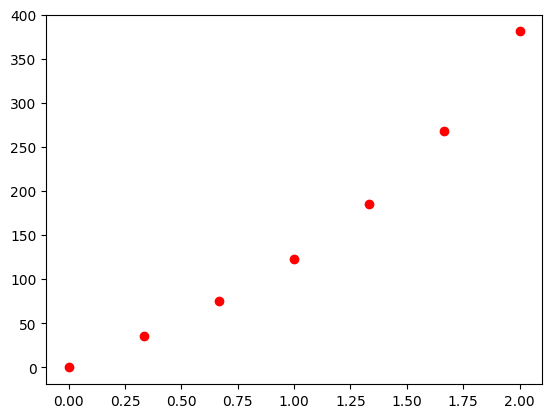

In [ ]:
from functools import partial

def disparo_no_lineal_newton(f,a,b,alfa,beta,n,f_y ,f_z,j = 7):
  y = lambda x,M: pseudo_code(f,a,x,alfa,M,n)[0][-1]
  y_d = lambda x,M: pseudo_code(f,a,x,alfa,M,n)[1][-1]
  F = lambda M: y(b,M) - beta
  g = lambda x,s,t,M: f_y(x,y(b,M),y_d(b,M))*s + f_z(x,y(b,M),y_d(b,M))*t
  #esquema de newton
  T = (beta-alfa)/(b-a)
  for i in range(j):
    h = partial(g, M = T)
    l = lambda x,y,z: h(x,y,z)
    z = pseudo_code(l,a,b,0.0,1.0,n)[0][-1]
    T = T + F(T)/z
    print(T, z)
  return pseudo_code(f,a,b,alfa,T,n)

f = lambda x,y,z: y
fy = lambda x,y,z: 1
fz = lambda x,y,z: 0
a = 0
alfa = 0
b = 2
beta = np.sinh(2)
n = 6
u = disparo_no_lineal_newton(f,a,b,alfa,beta,n,fy,fz)
h = (b-a)/n
t = np.array([a+i*h for i in range(n+1)])
#ploteando discretización
#VALOR Y = u[0]
plt.scatter(t,u[0], c = 'red')

In [ ]:
h = lambda x,y,z,u: x+y+z+u
from sympy import lambdify
T = 0
n = 6
print(type(h))
for i in range(n):
  f = partial(h, u = T)
  g = lambda x,y,z: f(x,y,z)
  print(f(i,i,i),type(f),type(g))
  T = T+3

<class 'function'>
0 <class 'functools.partial'> <class 'function'>
6 <class 'functools.partial'> <class 'function'>
12 <class 'functools.partial'> <class 'function'>
18 <class 'functools.partial'> <class 'function'>
24 <class 'functools.partial'> <class 'function'>
30 <class 'functools.partial'> <class 'function'>
